In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [65]:
amazon_categories=pd.read_csv("amazon_categories.csv")
amazon_products=pd.read_csv("amazon_products.csv")

In [66]:
amazon_categories

id                                    category_name
0      1                         Beading & Jewelry Making
1      2                                Fabric Decorating
2      3                      Knitting & Crochet Supplies
3      4                             Printmaking Supplies
4      5                 Scrapbooking & Stamping Supplies
..   ...                                              ...
243  262  Xbox Series X & S Consoles, Games & Accessories
244  263                           PC Games & Accessories
245  264                     Baby Girls' Clothing & Shoes
246  265                            Boys' School Uniforms
247  270                                     Toys & Games

[248 rows x 2 columns]

In [67]:
amazon_categories.isna().sum()

id               0
category_name    0
dtype: int64

In [68]:
amazon_categories.duplicated().sum()

0

In [69]:
amazon_categories.columns

Index(['id', 'category_name'], dtype='object')

In [70]:
amazon_categories.nunique()

id               248
category_name    248
dtype: int64

In [71]:
amazon_products=amazon_products[["asin","title","stars","reviews","price","listPrice","category_id","isBestSeller","boughtInLastMonth"]]
amazon_products.head()

asin                                              title  stars  \
0  B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...    4.5   
1  B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...    4.5   
2  B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...    4.6   
3  B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...    4.6   
4  B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...    4.5   

   reviews   price  listPrice  category_id  isBestSeller  boughtInLastMonth  
0        0  139.99       0.00          104         False               2000  
1        0  169.99     209.99          104         False               1000  
2        0  365.49     429.99          104         False                300  
3        0  291.59     354.37          104         False                400  
4        0  174.99     309.99          104         False                400

In [72]:
amazon_products.shape

(1426337, 9)

In [73]:
amazon_products.columns

Index(['asin', 'title', 'stars', 'reviews', 'price', 'listPrice',
       'category_id', 'isBestSeller', 'boughtInLastMonth'],
      dtype='object')

In [74]:
amazon_products.isna().sum()

asin                 0
title                1
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [75]:
amazon_products.duplicated().sum()

0

In [120]:
merged_data = amazon_products.merge(amazon_categories, left_on='category_id', right_on='id', how='inner')

asin                                              title  stars  \
0        B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...    4.5   
1        B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...    4.5   
2        B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...    4.6   
3        B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...    4.6   
4        B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...    4.5   
...             ...                                                ...    ...   
1426332  B07BW4W6QX  SoundBox 0 Gauge Amp Kit Amplifier Install Wir...    4.4   
1426333  B08F7RH7NY  Nextbase 622GW Front and Rear Dash Cam True 4K...    3.6   
1426334  B0CD7FN8BV  Newest Wireless Android Auto Car Adapter for O...    3.8   
1426335  B0B1QGRXKX  Android 11 Car Radio for Jeep Wrangler 2011 20...    3.0   
1426336  B0BKZTFND2  RED WOLF Radio Wiring Harness w/Antenna Adapte...    3.1   

         reviews   price  listPrice  category_id  isBestSeller  \
0              0  139.99       0.00          104         False   
1              0  169.99     209.99          104         False   
2              0  365.49     429.99          104         False   
3              0  291.59     354.37          104         False   
4              0  174.99     309.99          104         False   
...          ...     ...        ...          ...           ...   
1426332        0   74.95       0.00           26         False   
1426333        0  499.98       0.00           26         False   
1426334        0   49.99       0.00           26         False   
1426335        0  228.88     260.00           26         False   
1426336        0   18.99       0.00           26         False   

         boughtInLastMonth   id                  category_name  
0                     2000  104                      Suitcases  
1                     1000  104                      Suitcases  
2                      300  104                      Suitcases  
3                      400  104                      Suitcases  
4                      400  104                      Suitcases  
...                    ...  ...                            ...  
1426332                  0   26  Car Electronics & Accessories  
1426333                  0   26  Car Electronics & Accessories  
1426334                  0   26  Car Electronics & Accessories  
1426335                  0   26  Car Electronics & Accessories  
1426336                  0   26  Car Electronics & Accessories  

[1426337 rows x 11 columns]

In [77]:
Amazon_product_sales=merged_data
Amazon_product_sales

asin                                              title  stars  \
0        B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...    4.5   
1        B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...    4.5   
2        B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...    4.6   
3        B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...    4.6   
4        B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...    4.5   
...             ...                                                ...    ...   
1426332  B07BW4W6QX  SoundBox 0 Gauge Amp Kit Amplifier Install Wir...    4.4   
1426333  B08F7RH7NY  Nextbase 622GW Front and Rear Dash Cam True 4K...    3.6   
1426334  B0CD7FN8BV  Newest Wireless Android Auto Car Adapter for O...    3.8   
1426335  B0B1QGRXKX  Android 11 Car Radio for Jeep Wrangler 2011 20...    3.0   
1426336  B0BKZTFND2  RED WOLF Radio Wiring Harness w/Antenna Adapte...    3.1   

         reviews   price  listPrice  category_id  isBestSeller  \
0              0  139.99       0.00          104         False   
1              0  169.99     209.99          104         False   
2              0  365.49     429.99          104         False   
3              0  291.59     354.37          104         False   
4              0  174.99     309.99          104         False   
...          ...     ...        ...          ...           ...   
1426332        0   74.95       0.00           26         False   
1426333        0  499.98       0.00           26         False   
1426334        0   49.99       0.00           26         False   
1426335        0  228.88     260.00           26         False   
1426336        0   18.99       0.00           26         False   

         boughtInLastMonth   id                  category_name  
0                     2000  104                      Suitcases  
1                     1000  104                      Suitcases  
2                      300  104                      Suitcases  
3                      400  104                      Suitcases  
4                      400  104                      Suitcases  
...                    ...  ...                            ...  
1426332                  0   26  Car Electronics & Accessories  
1426333                  0   26  Car Electronics & Accessories  
1426334                  0   26  Car Electronics & Accessories  
1426335                  0   26  Car Electronics & Accessories  
1426336                  0   26  Car Electronics & Accessories  

[1426337 rows x 11 columns]

In [78]:
Amazon_product_sales.shape

(1426337, 11)

In [79]:
for i, col in enumerate(Amazon_product_sales.columns[:12]):
    print("COLUMN", i+1, ":", col)

COLUMN 1 : asin
COLUMN 2 : title
COLUMN 3 : stars
COLUMN 4 : reviews
COLUMN 5 : price
COLUMN 6 : listPrice
COLUMN 7 : category_id
COLUMN 8 : isBestSeller
COLUMN 9 : boughtInLastMonth
COLUMN 10 : id
COLUMN 11 : category_name


In [80]:
Amazon_product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   stars              1426337 non-null  float64
 3   reviews            1426337 non-null  int64  
 4   price              1426337 non-null  float64
 5   listPrice          1426337 non-null  float64
 6   category_id        1426337 non-null  int64  
 7   isBestSeller       1426337 non-null  bool   
 8   boughtInLastMonth  1426337 non-null  int64  
 9   id                 1426337 non-null  int64  
 10  category_name      1426337 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 110.2+ MB


In [81]:
Amazon_product_sales.describe().T

count        mean          std  min    25%     50%  \
stars              1426337.0    3.999512     1.344292  0.0   4.10    4.40   
reviews            1426337.0  180.750820  1761.452959  0.0   0.00    0.00   
price              1426337.0   43.375404   130.289296  0.0  11.99   19.95   
listPrice          1426337.0   12.449160    46.111984  0.0   0.00    0.00   
category_id        1426337.0  123.740881    73.112735  1.0  65.00  120.00   
boughtInLastMonth  1426337.0  141.982295   836.271965  0.0   0.00    0.00   
id                 1426337.0  123.740881    73.112735  1.0  65.00  120.00   

                      75%        max  
stars                4.60       5.00  
reviews              0.00  346563.00  
price               35.99   19731.81  
listPrice            0.00     999.99  
category_id        176.00     270.00  
boughtInLastMonth   50.00  100000.00  
id                 176.00     270.00

In [82]:
Amazon_product_sales.describe(include="object").T

count   unique              top   freq
asin           1426337  1426337       B014TMV5YE      1
title          1426336  1385430    Men's Sneaker     89
category_name  1426337      248  Girls' Clothing  28619

In [83]:
Amazon_product_sales.isna().sum()

asin                 0
title                1
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
id                   0
category_name        0
dtype: int64

In [84]:
Amazon_product_sales=Amazon_product_sales.dropna()

In [85]:
Amazon_product_sales.duplicated().sum()

0

In [86]:
Amazon_product_sales.dtypes

asin                  object
title                 object
stars                float64
reviews                int64
price                float64
listPrice            float64
category_id            int64
isBestSeller            bool
boughtInLastMonth      int64
id                     int64
category_name         object
dtype: object

In [87]:
numerical_columns=["reviews","price","listPrice","category_id","boughtInLastMonth","id"]
categorical_columns=["asin","title","isBestSeller","category_name"]


In [88]:
numerical_columns_correlation_analysis=Amazon_product_sales[numerical_columns].corr()
numerical_columns_correlation_analysis

reviews     price  listPrice  category_id  \
reviews            1.000000 -0.010069   0.012594     0.003641   
price             -0.010069  1.000000   0.200116    -0.039838   
listPrice          0.012594  0.200116   1.000000    -0.011751   
category_id        0.003641 -0.039838  -0.011751     1.000000   
boughtInLastMonth  0.147906 -0.026597   0.003775     0.011883   
id                 0.003641 -0.039838  -0.011751     1.000000   

                   boughtInLastMonth        id  
reviews                     0.147906  0.003641  
price                      -0.026597 -0.039838  
listPrice                   0.003775 -0.011751  
category_id                 0.011883  1.000000  
boughtInLastMonth           1.000000  0.011883  
id                          0.011883  1.000000

In [89]:
Amazon_product_sales.columns

Index(['asin', 'title', 'stars', 'reviews', 'price', 'listPrice',
       'category_id', 'isBestSeller', 'boughtInLastMonth', 'id',
       'category_name'],
      dtype='object')

In [90]:
df=Amazon_product_sales[['asin', 'title', 'stars', 'reviews', 'price', 'listPrice',
       'category_id', 'isBestSeller', 'boughtInLastMonth', 'id',
       'category_name']]
encoder=LabelEncoder()
for col in df[categorical_columns]:
    df[col]=encoder.fit_transform(df[col])
    

categorical_columns_correlation_analysis=df[categorical_columns].corr()
categorical_columns_correlation_analysis

asin     title  isBestSeller  category_name
asin           1.000000 -0.053376     -0.032299       0.026749
title         -0.053376  1.000000      0.001806       0.094116
isBestSeller  -0.032299  0.001806      1.000000      -0.001986
category_name  0.026749  0.094116     -0.001986       1.000000

In [91]:
Amazon_product_sales_correaltion_analysis=df.corr()
Amazon_product_sales_correaltion_analysis

asin     title     stars   reviews     price  \
asin               1.000000 -0.053376 -0.299437 -0.069615  0.005300   
title             -0.053376  1.000000  0.003859  0.011471  0.018988   
stars             -0.299437  0.003859  1.000000  0.037106 -0.079325   
reviews           -0.069615  0.011471  0.037106  1.000000 -0.010069   
price              0.005300  0.018988 -0.079325 -0.010069  1.000000   
listPrice         -0.042366  0.037091  0.025819  0.012594  0.200116   
category_id        0.002122  0.028451 -0.019884  0.003641 -0.039838   
isBestSeller      -0.032299  0.001806  0.028517  0.094085 -0.008124   
boughtInLastMonth -0.056644 -0.001005  0.062974  0.147906 -0.026597   
id                 0.002122  0.028451 -0.019884  0.003641 -0.039838   
category_name      0.026749  0.094116 -0.007443  0.003374 -0.010968   

                   listPrice  category_id  isBestSeller  boughtInLastMonth  \
asin               -0.042366     0.002122     -0.032299          -0.056644   
title               0.037091     0.028451      0.001806          -0.001005   
stars               0.025819    -0.019884      0.028517           0.062974   
reviews             0.012594     0.003641      0.094085           0.147906   
price               0.200116    -0.039838     -0.008124          -0.026597   
listPrice           1.000000    -0.011751      0.011185           0.003775   
category_id        -0.011751     1.000000      0.008838           0.011883   
isBestSeller        0.011185     0.008838      1.000000           0.202391   
boughtInLastMonth   0.003775     0.011883      0.202391           1.000000   
id                 -0.011751     1.000000      0.008838           0.011883   
category_name       0.014303     0.303201     -0.001986          -0.004591   

                         id  category_name  
asin               0.002122       0.026749  
title              0.028451       0.094116  
stars             -0.019884      -0.007443  
reviews            0.003641       0.003374  
price             -0.039838      -0.010968  
listPrice         -0.011751       0.014303  
category_id        1.000000       0.303201  
isBestSeller       0.008838      -0.001986  
boughtInLastMonth  0.011883      -0.004591  
id                 1.000000       0.303201  
category_name      0.303201       1.000000

<Axes: >

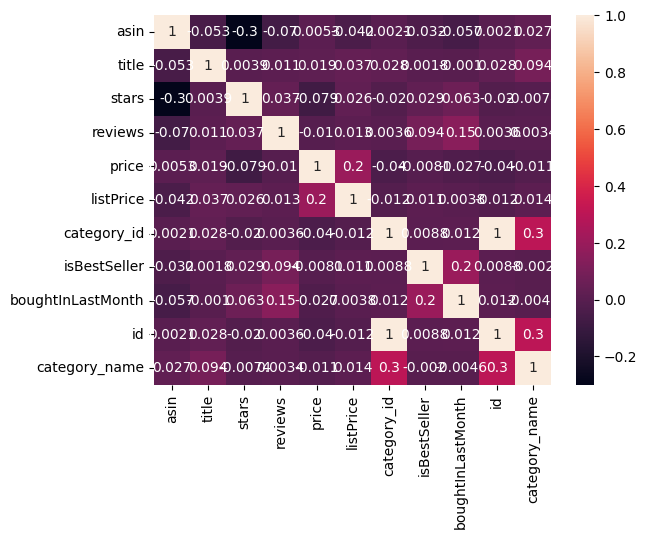

In [92]:
sns.heatmap(Amazon_product_sales_correaltion_analysis, annot=True)

In [93]:
Amazon_product_sales["category_name"].value_counts()

category_name
Girls' Clothing                                   28619
Boys' Clothing                                    24660
Toys & Games                                      20846
Men's Shoes                                       19822
Women's Handbags                                  18994
                                                  ...  
Smart Home: Lawn and Garden                          76
Smart Home: Voice Assistants and Hubs                50
Smart Home: New Smart Devices                        42
Garment Bags                                         40
Smart Home Thermostats - Compatibility Checker       22
Name: count, Length: 248, dtype: int64

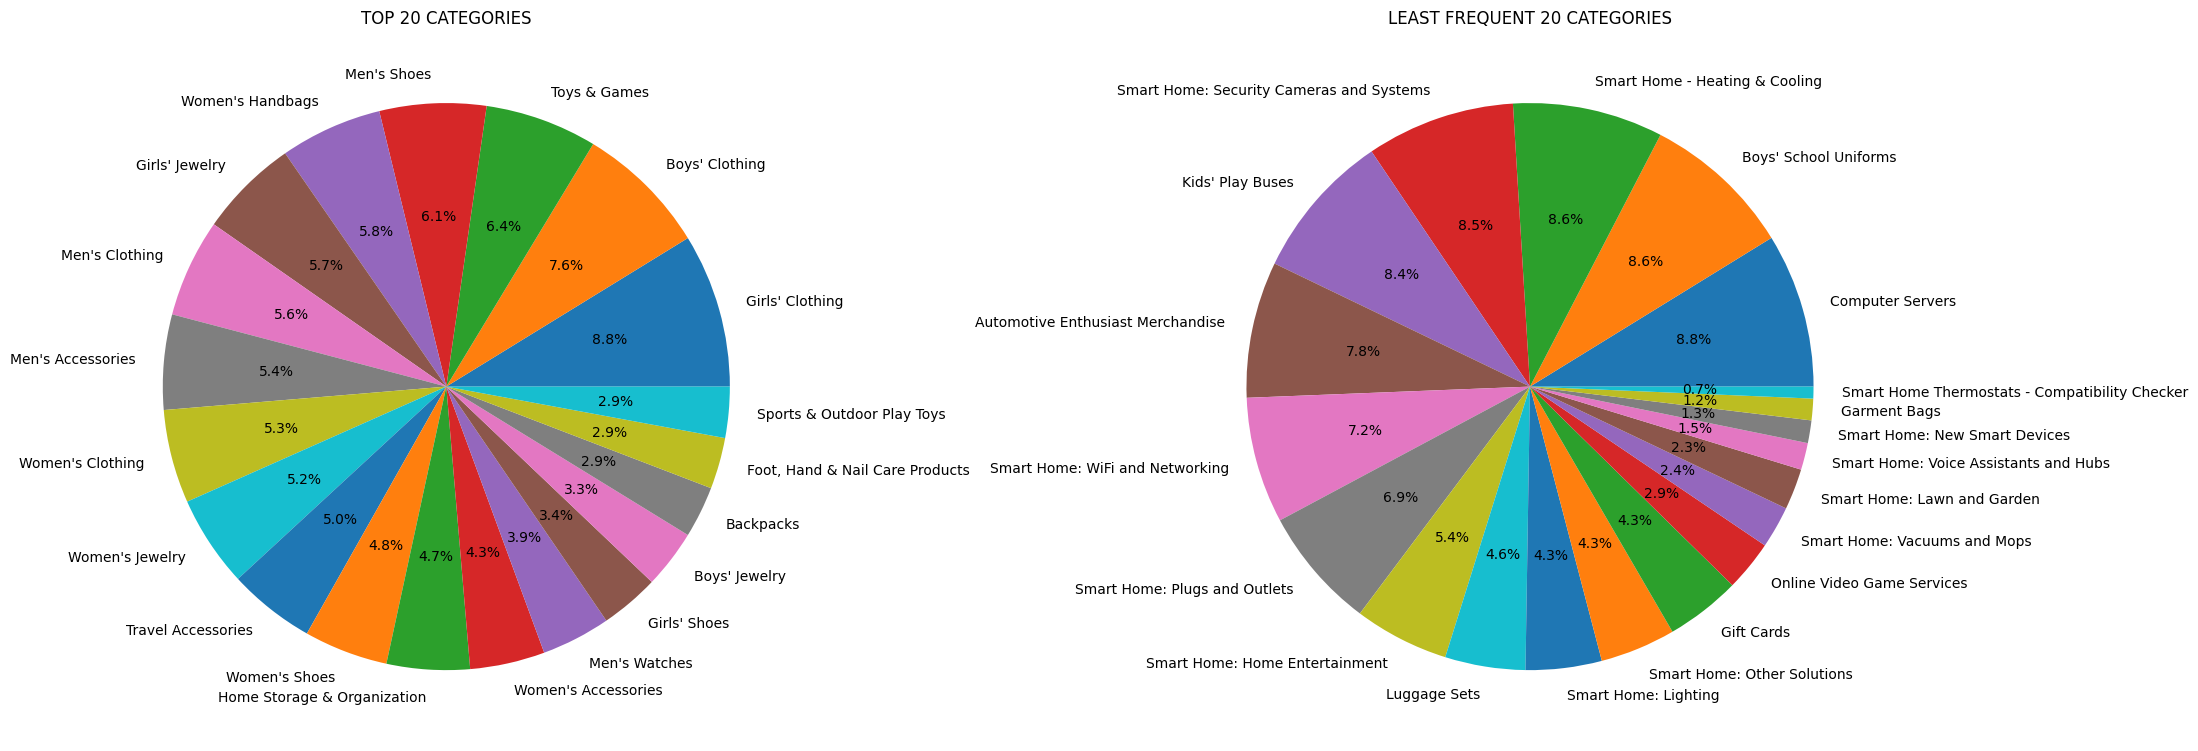

TOP 20 CATEGORIES  : category_name
Girls' Clothing                    28619
Boys' Clothing                     24660
Toys & Games                       20846
Men's Shoes                        19822
Women's Handbags                   18994
Girls' Jewelry                     18514
Men's Clothing                     18258
Men's Accessories                  17679
Women's Clothing                   17393
Women's Jewelry                    17005
Travel Accessories                 16160
Women's Shoes                      15626
Home Storage & Organization        15437
Women's Accessories                13921
Men's Watches                      12839
Girls' Shoes                       10938
Boys' Jewelry                      10868
Backpacks                           9580
Foot, Hand & Nail Care Products     9535
Sports & Outdoor Play Toys          9485
Name: count, dtype: int64 ***********************************************************************************************************************

In [94]:
category_counts = Amazon_product_sales["category_name"].value_counts()
top_20_categories = category_counts[:20]
least_20_categories = category_counts[-20:]
fig, axs = plt.subplots(1, 2, figsize=(22,18))
axs[0].pie(top_20_categories, labels = top_20_categories.index, autopct='%1.1f%%')
axs[0].set_title('TOP 20 CATEGORIES')
axs[1].pie(least_20_categories, labels = least_20_categories.index, autopct='%1.1f%%')
axs[1].set_title('LEAST FREQUENT 20 CATEGORIES')
plt.tight_layout()
plt.show()
print("TOP 20 CATEGORIES  :",top_20_categories,"*"*150,
      "LEAST FREQUENT 20 CATEGORIES :",least_20_categories)


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

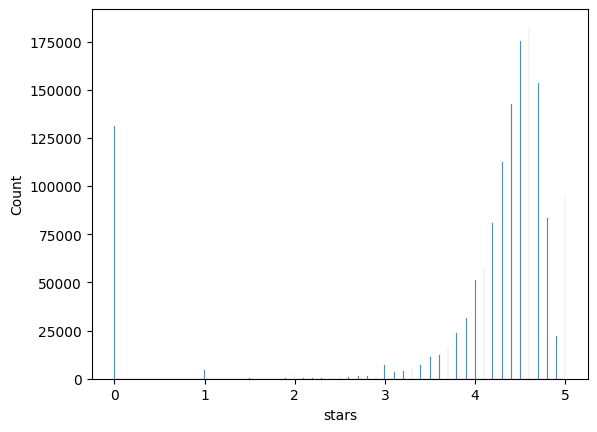

In [95]:
sns.histplot(df,x="stars")

In [96]:
# Assuming 'Amazon_product_sales' is your original DataFrame and 'category_name' is the column with categories
top_20_categories_list = top_20_categories.index.tolist()
least_20_categories_list = least_20_categories.index.tolist()
least_20_categories_list

['Computer Servers',
 "Boys' School Uniforms",
 'Smart Home - Heating & Cooling',
 'Smart Home: Security Cameras and Systems',
 "Kids' Play Buses",
 'Automotive Enthusiast Merchandise',
 'Smart Home: WiFi and Networking',
 'Smart Home: Plugs and Outlets',
 'Smart Home: Home Entertainment',
 'Luggage Sets',
 'Smart Home: Lighting',
 'Smart Home: Other Solutions',
 'Gift Cards',
 'Online Video Game Services',
 'Smart Home: Vacuums and Mops',
 'Smart Home: Lawn and Garden',
 'Smart Home: Voice Assistants and Hubs',
 'Smart Home: New Smart Devices',
 'Garment Bags',
 'Smart Home Thermostats - Compatibility Checker']

In [98]:
# Create a new DataFrame that only includes rows where 'category_name' is in 'top_20_categories_list'
filtered_df1 = Amazon_product_sales[Amazon_product_sales['category_name'].isin(top_20_categories_list)]
filtered_df2 = Amazon_product_sales[Amazon_product_sales['category_name'].isin(least_20_categories_list)]

In [99]:
Amazon_product_sales_top_20=filtered_df1
Amazon_product_sales_least_20=filtered_df2

MEAN AND MEDIAN PRIICE OF TOP 20 CATEGORIES
                                 Mean Price  Median Price
category_name                                            
Backpacks                         52.034817         32.99
Boys' Clothing                    25.378160         21.99
Boys' Jewelry                     15.893607         11.99
Foot, Hand & Nail Care Products   13.476653          9.93
Girls' Clothing                   24.657649         21.99
Girls' Jewelry                    24.043344         13.99
Girls' Shoes                      37.136349         31.49
Home Storage & Organization       52.747359         23.49
Men's Accessories                 42.724541         22.01
Men's Clothing                    45.008091         31.99
Men's Shoes                       93.595064         79.95
Men's Watches                    123.174783         61.00
Sports & Outdoor Play Toys        29.980779         19.99
Toys & Games                      29.751486         19.99
Travel Accessories          

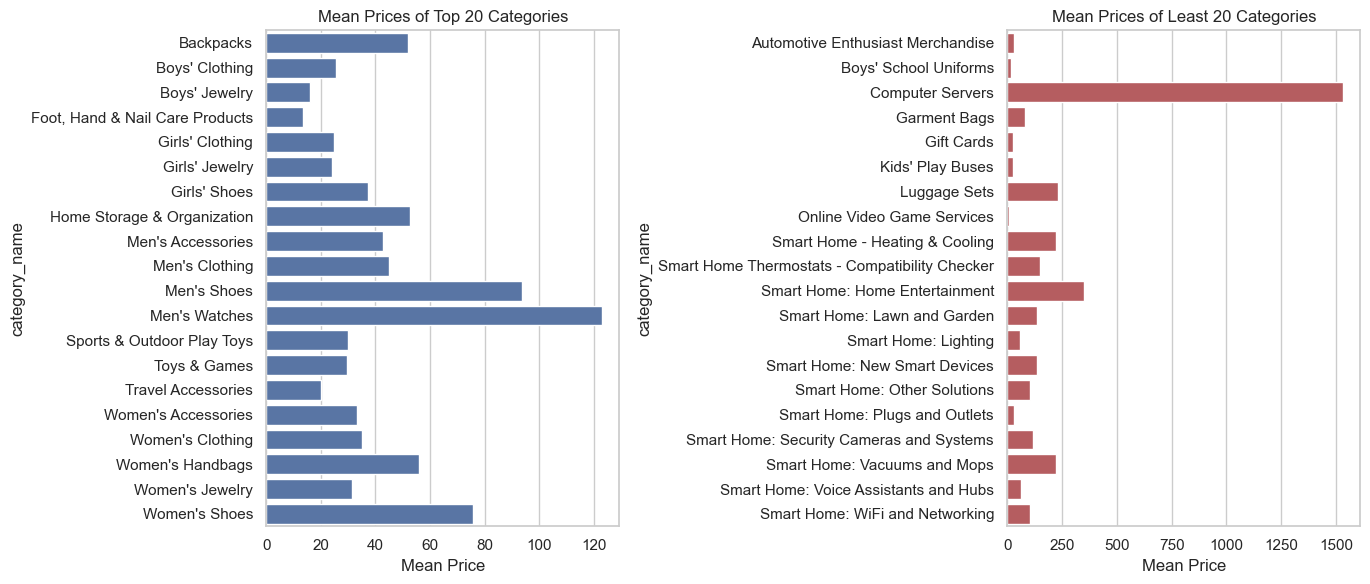

In [111]:
# Calculate mean and median prices
print("MEAN AND MEDIAN PRIICE OF TOP 20 CATEGORIES")
mean_prices = Amazon_product_sales1.groupby("category_name")["price"].mean()
median_prices = Amazon_product_sales1.groupby("category_name")["price"].median()
price_stats_top20 = pd.DataFrame({
    'Mean Price': mean_prices,
    'Median Price': median_prices
})
print(price_stats_top20)


print("*"*60)
print("*"*60)
print("*"*60)


print("MEAN AND MEDIAN PRIICE OF LEAST 20 CATEGORIES")

mean_prices = Amazon_product_sales_least_20.groupby("category_name")["price"].mean()
median_prices = Amazon_product_sales_least_20.groupby("category_name")["price"].median()
price_stats_least= pd.DataFrame({
    'Mean Price': mean_prices,
    'Median Price': median_prices
})
print(price_stats_least)

import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.barplot(x='Mean Price', y=price_stats_top20.index, data=price_stats_top20, color='b')
plt.title('Mean Prices of Top 20 Categories')


plt.subplot(1, 2, 2)
sns.barplot(x='Mean Price', y=price_stats_least.index, data=price_stats_least, color='r')
plt.title('Mean Prices of Least 20 Categories')


plt.tight_layout()
plt.show()


1.Top 20 Categories:

        The category with the highest mean price is Men’s Watches at approximately $123.17, while the category with the lowest mean price is Foot, Hand & Nail Care Products at approximately $13.48.
        The category with the highest median price is Men’s Shoes at $79.95, while the category with the lowest median price is Foot, Hand & Nail Care Products at $9.93.
        The categories Men’s Watches, Men’s Shoes, and Women’s Shoes have relatively high mean and median prices, suggesting these categories generally have more expensive products.
        The categories Foot, Hand & Nail Care Products, Boys’ Jewelry, and Travel Accessories have relatively low mean and median prices, suggesting these categories generally have less expensive products.
            

2.Least 20 Categories:

            The category with the highest mean price is Computer Servers at approximately $1534.22, which is significantly higher than any other category. This suggests that products in this category are generally very expensive.
            The category with the lowest mean price is Online Video Game Services at approximately $9.26.
            The category with the highest median price is Computer Servers at $492.00, while the category with the lowest median price is Online Video Game Services at $0.00.
            The categories Computer Servers, Smart Home: Home Entertainment, and Luggage Sets have relatively high mean and median prices, suggesting these categories generally have more expensive products.
            The categories Online Video Game Services, Boys’ School Uniforms, and Gift Cards have relatively low mean and median prices, suggesting these categories generally have less expensive products.

3.Comparing Top 20 and Least 20 Categories:

            The Computer Servers category from the least 20 categories has a much higher mean and median price than any category from the top 20 categories. This could be due to the high cost of server hardware.
            The Online Video Game Services category from the least 20 categories has a lower mean price than any category from the top 20 categories. This could be due to the fact that many online video game services offer free or low-cost options

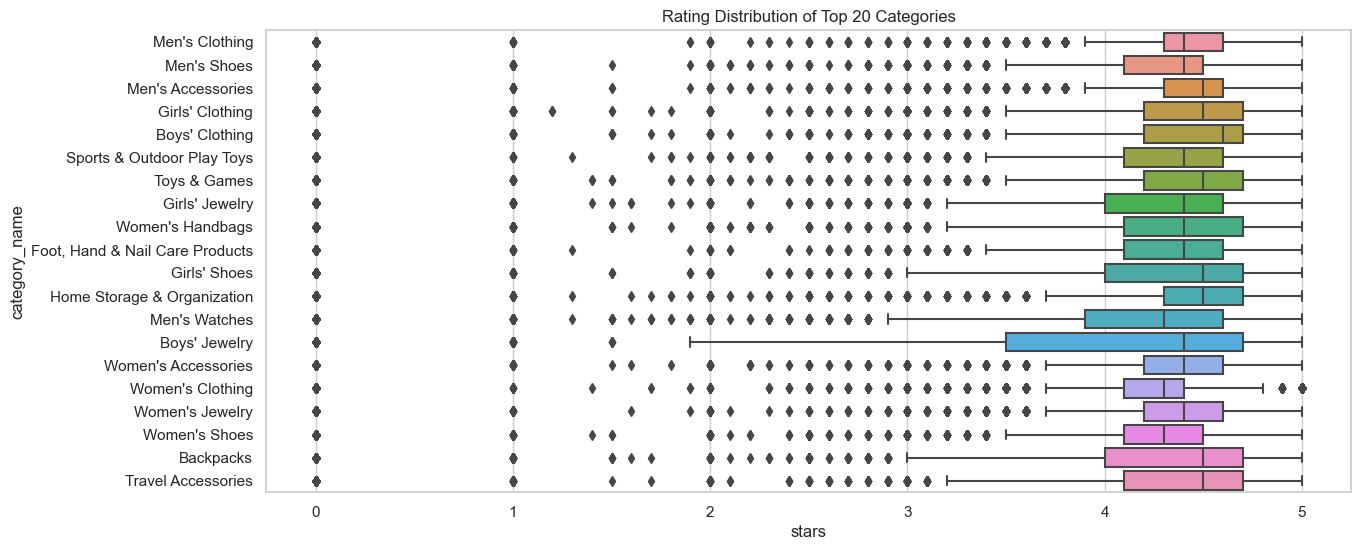

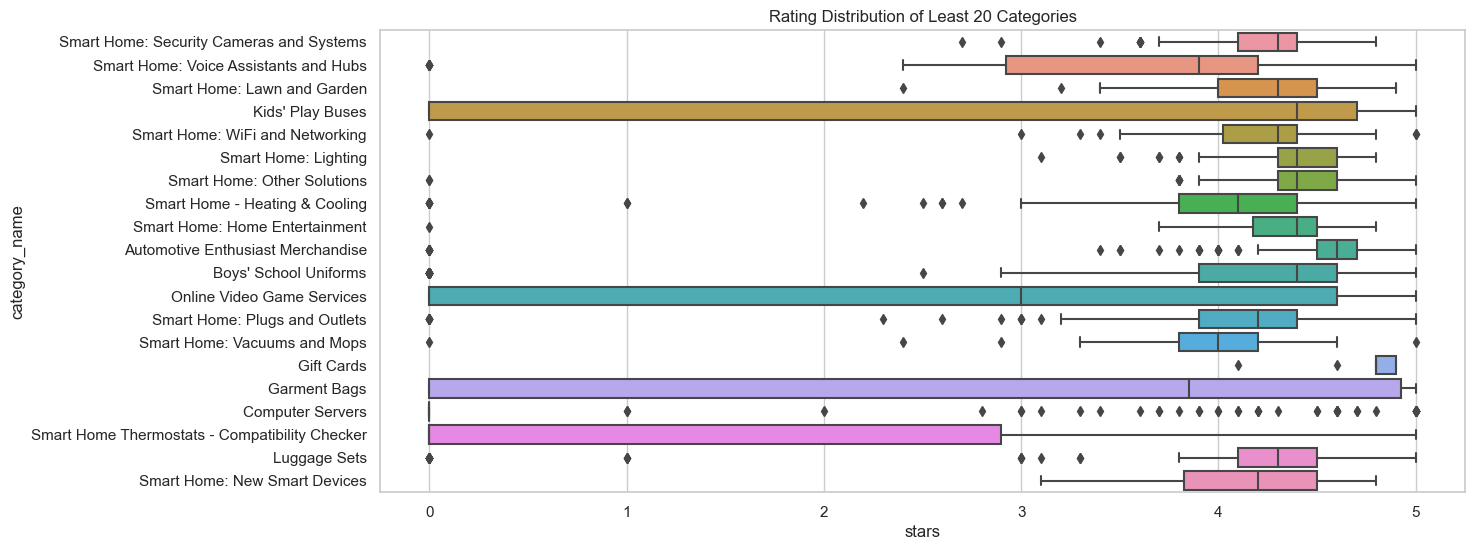

Mean and Median Ratings of Top 20 Categories
                                 Mean Rating
category_name                               
Backpacks                           3.823205
Boys' Clothing                      3.912291
Boys' Jewelry                       3.533438
Foot, Hand & Nail Care Products     4.217483
Girls' Clothing                     3.896841
Girls' Jewelry                      3.820314
Girls' Shoes                        3.711007
Home Storage & Organization         4.264112
Men's Accessories                   4.238368
Men's Clothing                      4.241949
Men's Shoes                         3.972763
Men's Watches                       3.860713
Sports & Outdoor Play Toys          4.206863
Toys & Games                        4.191442
Travel Accessories                  3.837686
Women's Accessories                 4.180885
Women's Clothing                    4.183384
Women's Handbags                    3.846794
Women's Jewelry                     4.245081
Women's Sh

In [119]:

import matplotlib.pyplot as plt
import seaborn as sns

#
sns.set(style="whitegrid")

#
plt.figure(figsize=(14, 6))
sns.boxplot(x='stars', y='category_name', data=Amazon_product_sales1[Amazon_product_sales1['category_name'].isin(top_20_categories_list)])
plt.title('Rating Distribution of Top 20 Categories')
plt.show()


plt.figure(figsize=(14, 6))
sns.boxplot(x='stars', y='category_name', data=Amazon_product_sales_least_20[Amazon_product_sales_least_20['category_name'].isin(least_20_categories_list)])
plt.title('Rating Distribution of Least 20 Categories')
plt.show()




mean_ratings_top20 = Amazon_product_sales1.groupby("category_name")["stars"].mean()
ratings_stats_top20 = pd.DataFrame({
    'Mean Rating': mean_ratings_top20
})
print("Mean and Median Ratings of Top 20 Categories")
print(ratings_stats_top20)


print("**"*50)
mean_ratings_least20 = Amazon_product_sales_least_20.groupby("category_name")["stars"].mean()
ratings_stats_least20 = pd.DataFrame({
    'Mean Rating': mean_ratings_least20
})
print("Mean and Median Ratings of Least 20 Categories")
print(ratings_stats_least20)


1.Top 20 Categories:

    The category with the highest mean rating is Foot, Hand & Nail Care Products with a rating of approximately 4.22.
    The category with the lowest mean rating is Boys’ Jewelry with a rating of approximately 3.53.
    Most categories have a mean rating above 3.5, indicating generally positive reviews.
        

2.Least 20 Categories:

    The category with the highest mean rating is Gift Cards with a rating of approximately 4.83.
    The category with the lowest mean rating is Computer Servers with a rating of approximately 0.65. This is significantly lower than any other category and might indicate dissatisfaction with these products or a small number of high-rating reviews.
    Most categories have a mean rating above 3, indicating generally positive reviews. However, there are a few categories with lower ratings, such as Computer Servers and Garment Bags.

3.Comparing Top 20 and Least 20 Categories:

    The Gift Cards category from the least 20 categories has a higher mean rating than any category from the top 20 categories. This could be due to the fact that gift cards are generally well-received as they allow the recipient to choose their own gift.
    The Computer Servers category from the least 20 categories has a lower mean rating than any category from the top 20 categories. As mentioned earlier, this might indicate dissatisfaction with these products or a small number of high-rating reviews.

In [122]:

from sklearn.cluster import KMeans

df = merged_data

numerical_cols = ['stars', 'reviews', 'price', 'listPrice', 'boughtInLastMonth']

df = df.dropna(subset=numerical_cols)

kmeans = KMeans(n_clusters=3, random_state=0).fit(df[numerical_cols])

df['cluster'] = kmeans.labels_

df


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


asin                                              title  stars  \
0        B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...    4.5   
1        B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...    4.5   
2        B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...    4.6   
3        B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...    4.6   
4        B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...    4.5   
...             ...                                                ...    ...   
1426332  B07BW4W6QX  SoundBox 0 Gauge Amp Kit Amplifier Install Wir...    4.4   
1426333  B08F7RH7NY  Nextbase 622GW Front and Rear Dash Cam True 4K...    3.6   
1426334  B0CD7FN8BV  Newest Wireless Android Auto Car Adapter for O...    3.8   
1426335  B0B1QGRXKX  Android 11 Car Radio for Jeep Wrangler 2011 20...    3.0   
1426336  B0BKZTFND2  RED WOLF Radio Wiring Harness w/Antenna Adapte...    3.1   

         reviews   price  listPrice  category_id  isBestSeller  \
0              0  139.99       0.00          104         False   
1              0  169.99     209.99          104         False   
2              0  365.49     429.99          104         False   
3              0  291.59     354.37          104         False   
4              0  174.99     309.99          104         False   
...          ...     ...        ...          ...           ...   
1426332        0   74.95       0.00           26         False   
1426333        0  499.98       0.00           26         False   
1426334        0   49.99       0.00           26         False   
1426335        0  228.88     260.00           26         False   
1426336        0   18.99       0.00           26         False   

         boughtInLastMonth   id                  category_name  cluster  
0                     2000  104                      Suitcases        0  
1                     1000  104                      Suitcases        0  
2                      300  104                      Suitcases        0  
3                      400  104                      Suitcases        0  
4                      400  104                      Suitcases        0  
...                    ...  ...                            ...      ...  
1426332                  0   26  Car Electronics & Accessories        0  
1426333                  0   26  Car Electronics & Accessories        0  
1426334                  0   26  Car Electronics & Accessories        0  
1426335                  0   26  Car Electronics & Accessories        0  
1426336                  0   26  Car Electronics & Accessories        0  

[1426337 rows x 12 columns]

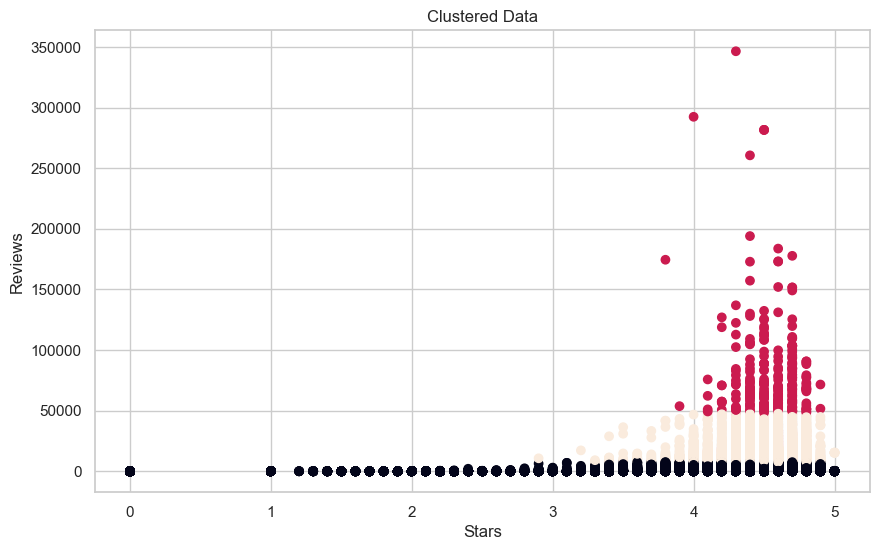

In [123]:
import matplotlib.pyplot as plt

# Assuming 'stars' and 'reviews' are the two main factors you want to consider for the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['stars'], df['reviews'], c=df['cluster'])
plt.title('Clustered Data')
plt.xlabel('Stars')
plt.ylabel('Reviews')
plt.show()
